# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Loading the Datasets 

In [2]:
df =pd.read_csv('/kaggle/input/itc-nse-24-year-stock-data/ITC-EQ-01-04-2000-to-31-03-2024.csv', parse_dates=['date'])


### Setting the date Column as Index

In [3]:
df.set_index('date', inplace=True)

# Data Exploring + Statistical Analysis

In [4]:
df.head()

,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
date,,,,,,,,,,,,,
2000-04-03,EQ,739.9,800.8,721.05,741.45,792.75,797.00,772.76,1140.8,580.0,1720025,1.329165e+09,NaN
2000-04-04,EQ,785.0,785.0,733.25,797.00,733.25,733.25,744.37,1140.8,580.0,581309,4.327067e+08,NaN
2000-04-05,EQ,680.0,740.0,675.05,733.25,696.10,698.75,700.53,1140.8,580.0,706269,4.947637e+08,NaN
2000-04-06,EQ,705.0,711.0,646.10,698.75,685.00,682.80,676.06,1140.8,580.0,431386,2.916423e+08,NaN
2000-04-07,EQ,682.0,733.9,682.00,682.80,730.00,730.95,722.23,1140.8,580.0,1087357,7.853181e+08,NaN


In [5]:
df.shape

(5981, 13)

In [6]:
df.columns

Index(['series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close', 'vwap',
       '52w_h', '52w_l', 'volume', 'value', 'no_of_trades'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5981 entries, 2000-04-03 to 2024-03-28
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   series        5981 non-null   object 
 1   open          5981 non-null   float64
 2   high          5981 non-null   float64
 3   low           5981 non-null   float64
 4   prev._close   5981 non-null   float64
 5   ltp           5981 non-null   float64
 6   close         5981 non-null   float64
 7   vwap          5981 non-null   float64
 8   52w_h         5965 non-null   float64
 9   52w_l         5965 non-null   float64
 10  volume        5981 non-null   int64  
 11  value         5981 non-null   float64
 12  no_of_trades  3193 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 654.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,5981.0,4.050413e+02,3.095133e+02,115.00,2.064000e+02,2.818500e+02,4.434000e+02,1.946000e+03
high,5981.0,4.104750e+02,3.141657e+02,116.20,2.084000e+02,2.840000e+02,4.468500e+02,1.964800e+03
low,5981.0,3.993256e+02,3.051559e+02,114.40,2.038500e+02,2.785000e+02,4.397000e+02,1.916300e+03
prev._close,5981.0,4.048655e+02,3.096169e+02,115.45,2.060500e+02,2.815500e+02,4.429000e+02,1.940100e+03
ltp,5981.0,4.047832e+02,3.095252e+02,115.50,2.062000e+02,2.815000e+02,4.431000e+02,1.940000e+03
close,5981.0,4.048066e+02,3.095906e+02,115.45,2.062500e+02,2.815500e+02,4.429000e+02,1.940100e+03
vwap,5981.0,4.049716e+02,3.097643e+02,115.39,2.059700e+02,2.813300e+02,4.430400e+02,1.933790e+03
52w_h,5965.0,5.547094e+02,4.508506e+02,194.80,2.710000e+02,3.677000e+02,7.826500e+02,1.964800e+03
52w_l,5965.0,2.959045e+02,1.922752e+02,114.40,1.515500e+02,2.220000e+02,3.232500e+02,1.059900e+03
volume,5981.0,8.436510e+06,1.063934e+07,6797.00,2.286848e+06,5.974804e+06,1.022830e+07,1.494797e+08


In [9]:
df.nunique()

series             1
open            3378
high            3696
low             3853
prev._close     4301
ltp             3881
close           4301
vwap            5522
52w_h            322
52w_l            204
volume          5965
value           5966
no_of_trades    3154
dtype: int64

In [10]:
df.isna().sum().sort_values(ascending=False)

no_of_trades    2788
52w_h             16
52w_l             16
series             0
open               0
high               0
low                0
prev._close        0
ltp                0
close              0
vwap               0
volume             0
value              0
dtype: int64

# Handling the missing values 

In [11]:
df["no_of_trades"].fillna(df["no_of_trades"].mean(), inplace = True)
df["52w_h"].fillna(df["52w_h"].mean(), inplace=True)
df["52w_l"].fillna(df["52w_l"].mean(), inplace=True)


# Plot the stock prices over time

<Figure size 1600x800 with 0 Axes>

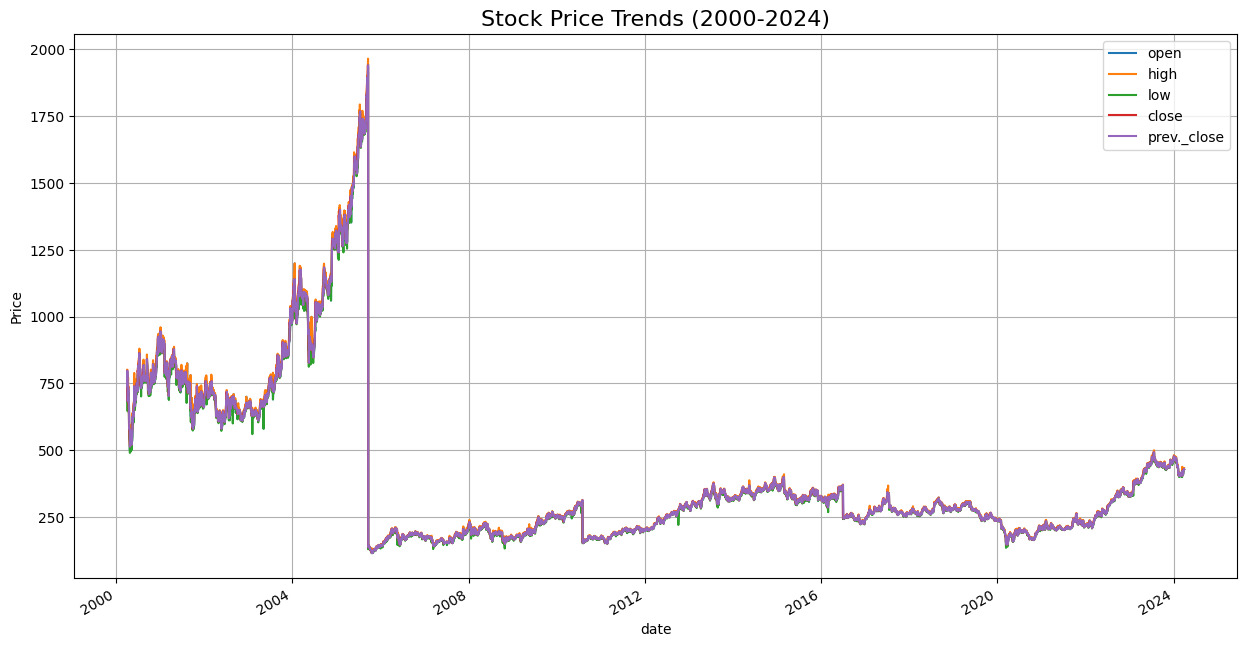

In [12]:
plt.figure(figsize=(16, 8))

# Plot open, high, low, close, prev_close
df[['open', 'high', 'low', 'close', 'prev._close']].plot(figsize=(15, 8), linewidth=1.5)
plt.title('Stock Price Trends (2000-2024)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate moving averages

In [13]:
df['50_MA'] = df['close'].rolling(window=50).mean()
df['200_MA'] = df['close'].rolling(window=200).mean()

# Plot closing prices with moving averages

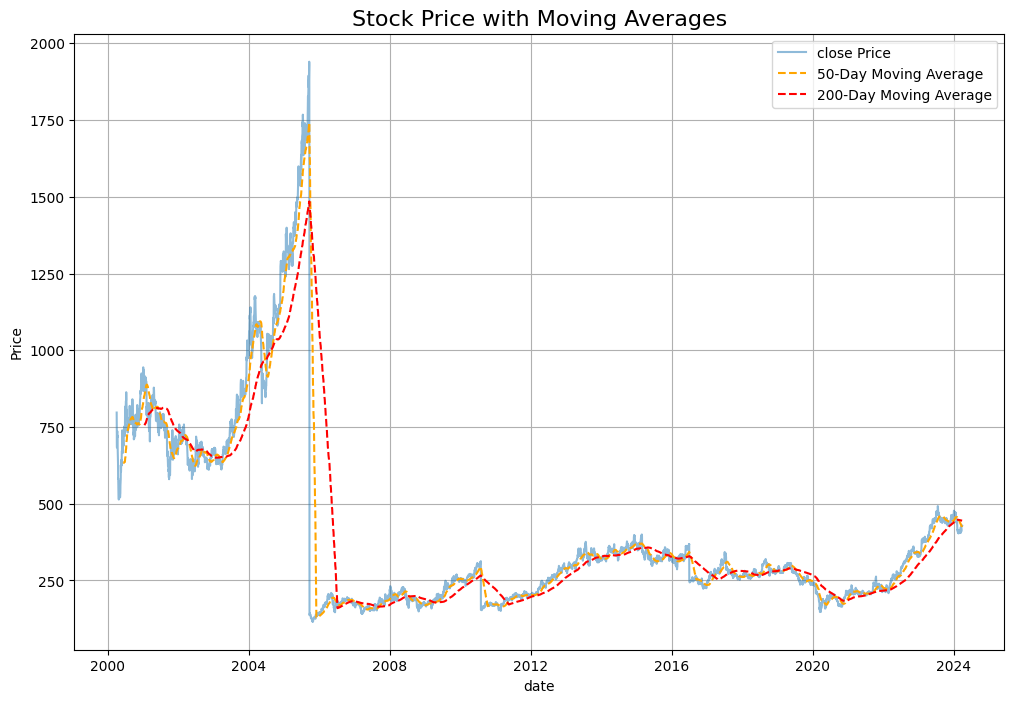

In [14]:

plt.figure(figsize=(12, 8))
plt.plot(df['close'], label='close Price', alpha=0.5)
plt.plot(df['50_MA'], label='50-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['200_MA'], label='200-Day Moving Average', color='red', linestyle='--')

plt.title('Stock Price with Moving Averages', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily price range

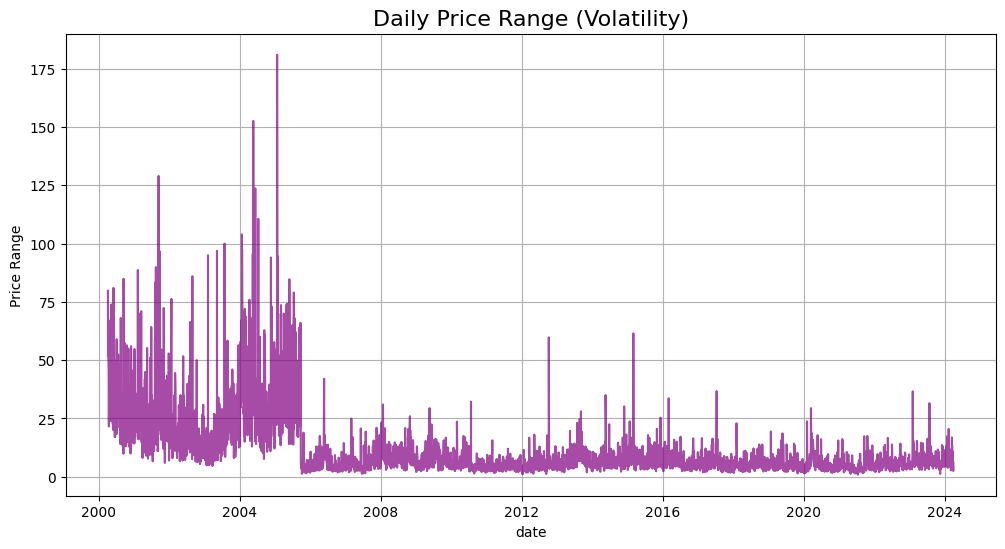

In [15]:

df['Daily Range'] = df['high'] - df['low']

# Plot the daily range (volatility)
plt.figure(figsize=(12, 6))
plt.plot(df['Daily Range'], label='Daily Price Range', color='purple', alpha=0.7)

plt.title('Daily Price Range (Volatility)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()

# We shall filter the Data for last 2 years. 

In [16]:
latest_2years_df = df[df.index >= '2022-03-31']
latest_2years_df = latest_2years_df.rename(columns={'prev._close': 'prev_close'})
latest_2years_df.head()


,series,open,high,low,prev_close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades,50_MA,200_MA,Daily Range
date,,,,,,,,,,,,,,,,
2022-03-31,EQ,249.60,254.35,249.5,249.20,250.70,250.65,251.19,265.3,199.1,25656796,6.444678e+09,131890.0,229.543,222.42175,4.85
2022-04-01,EQ,250.00,255.35,248.8,250.65,255.05,253.30,251.32,265.3,199.1,14305709,3.595279e+09,114531.0,230.194,222.65175,6.55
2022-04-04,EQ,253.10,257.90,251.1,253.30,255.75,255.45,254.24,265.3,199.1,15907398,4.044246e+09,109421.0,230.896,222.89375,6.80
2022-04-05,EQ,256.05,261.85,255.1,255.45,259.00,259.45,258.90,265.3,199.1,27183142,7.037729e+09,178177.0,231.710,223.15175,6.75
2022-04-06,EQ,257.50,263.35,257.3,259.45,260.00,259.60,260.20,265.3,199.1,19597941,5.099320e+09,155736.0,232.561,223.42150,6.05


In [17]:
import plotly.express as px

# Plot interactive line chart for stock prices
fig = px.line(latest_2years_df, x=latest_2years_df.index, y=['open', 'high', 'low', 'close', 'prev_close'],
              title='Stock Price Trends (Last 2 Years)')
fig.update_layout(xaxis_title='date', yaxis_title='Price', template='plotly_dark')
fig.show()

# Candlestick Chart


In [18]:
import plotly.graph_objects as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=latest_2years_df.index,
                                     open=latest_2years_df['open'],
                                     high=latest_2years_df['high'],
                                     low=latest_2years_df['low'],
                                     close=latest_2years_df['close'])])

fig.update_layout(title='Candlestick Chart (Last 2 Years)',
                  xaxis_title='date',
                  yaxis_title='Price',
                  template='plotly_dark')
fig.show()

# volume with Color-Coded Price Changes

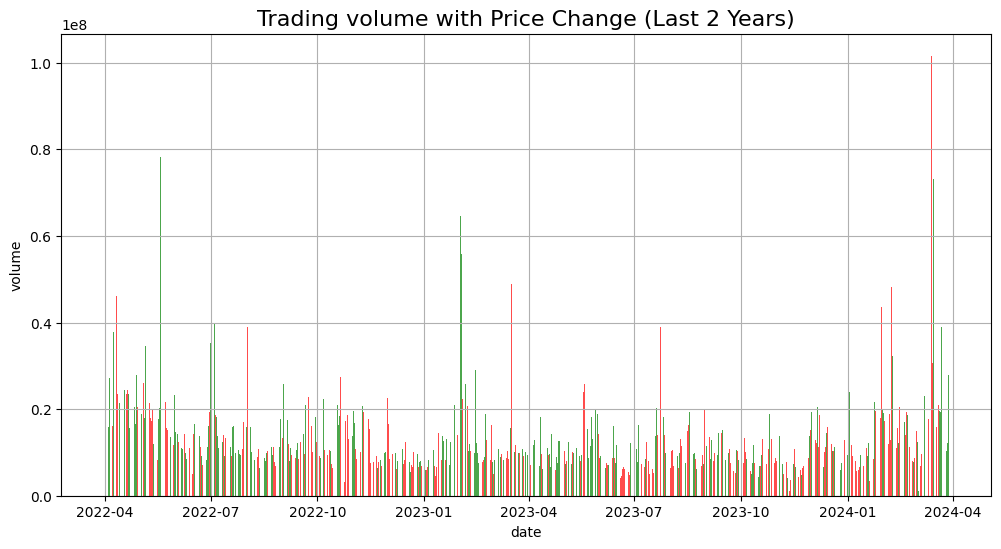

In [19]:
# Add a column to indicate if the stock closed higher or lower
# also using .loc[] to avoid SettingWithCopyWarning
latest_2years_df.loc[:, 'Price Change'] = latest_2years_df['close'] - latest_2years_df['open']
latest_2years_df.loc[:, 'Color'] = np.where(latest_2years_df['Price Change'] >= 0, 'green', 'red')


# Plot volume with color-coded price changes
plt.figure(figsize=(12, 6))
plt.bar(latest_2years_df.index, latest_2years_df['volume'], color=latest_2years_df['Color'], alpha=0.7)
plt.title('Trading volume with Price Change (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('volume')
plt.grid(True)
plt.show()

# Heatmap of Correlations

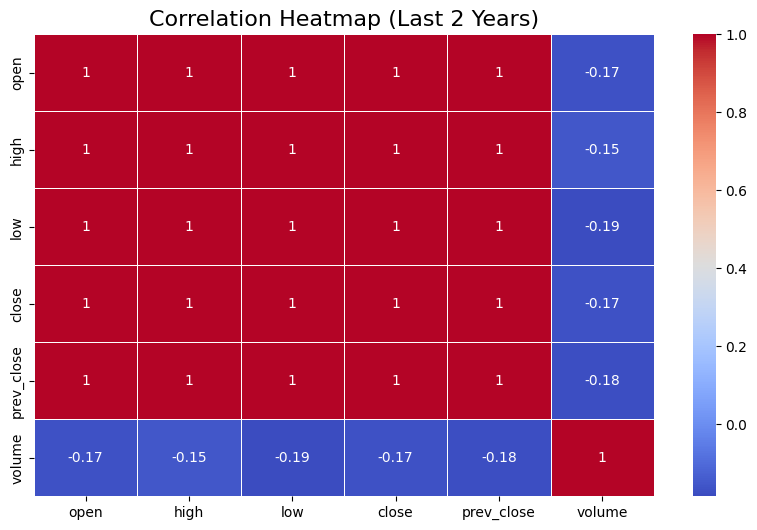

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = latest_2years_df[['open', 'high', 'low', 'close', 'prev_close', 'volume']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Last 2 Years)', fontsize=16)
plt.show()

# Price Returns Analysis

In [21]:
# Calculate daily returns
latest_2years_df['Daily Returns'] = latest_2years_df['close'].pct_change() * 100  # Percent change

# Drop NaN values created due to pct_change
latest_2years_df.dropna(subset=['Daily Returns'], inplace=True)

# Quick check of daily returns
latest_2years_df[['close', 'Daily Returns']].head()

,close,Daily Returns
date,,
2022-04-01,253.30,1.057251
2022-04-04,255.45,0.848796
2022-04-05,259.45,1.565864
2022-04-06,259.60,0.057815
2022-04-07,256.65,-1.136364


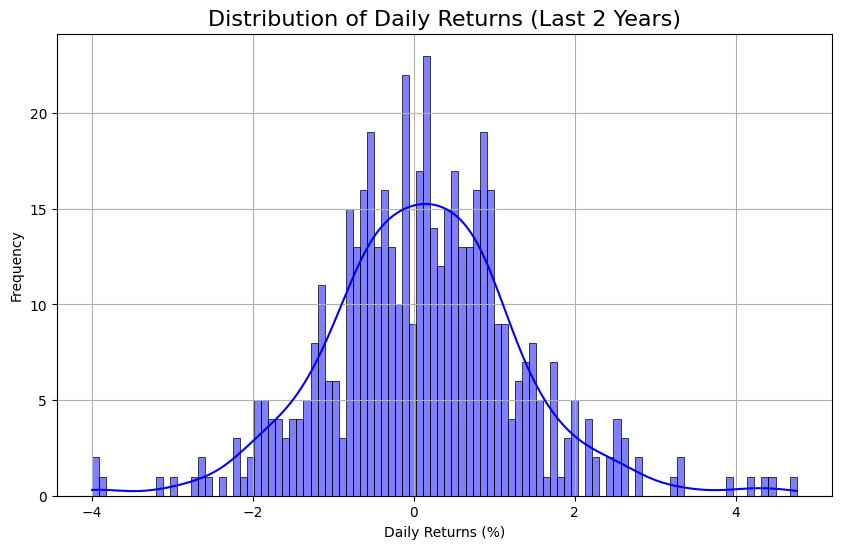

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(latest_2years_df['Daily Returns'], bins=100, kde=True, color='blue')

plt.title('Distribution of Daily Returns (Last 2 Years)', fontsize=16)
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


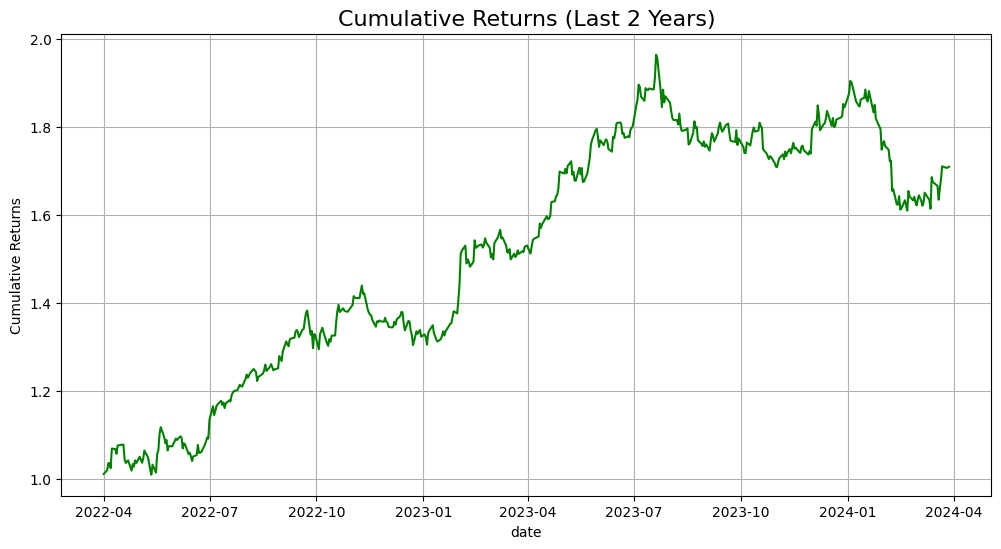

In [23]:
latest_2years_df['Cumulative Returns'] = (1 + latest_2years_df['Daily Returns'] / 100).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df.index, latest_2years_df['Cumulative Returns'], color='green')

plt.title('Cumulative Returns (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

# Volatility Analysis

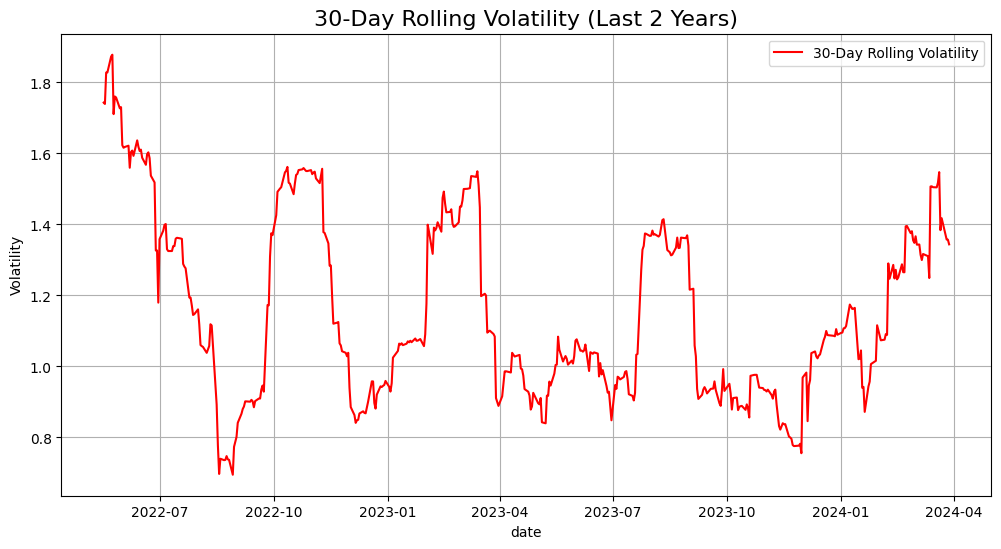

In [24]:
# Calculate 30-day rolling volatility (standard deviation of returns)
latest_2years_df['30_Day_Volatility'] = latest_2years_df['Daily Returns'].rolling(window=30).std()

# Plot the rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df.index, latest_2years_df['30_Day_Volatility'], color='red', label='30-Day Rolling Volatility')

plt.title('30-Day Rolling Volatility (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

#### Install arch library for GARCH modeling

In [25]:

!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 23.7 MB/s eta 0:00:00


# Volatility Clustering 

                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Daily Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -786.026
Distribution:                  Normal   AIC:                           1580.05
Method:            Maximum Likelihood   BIC:                           1596.87
                                        No. Observations:                  495
Date:                Wed, Mar 26 2025   Df Residuals:                      494
Time:                        12:42:51   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1188  5.221e-02      2.276  2.284e-02 [1.650e-0

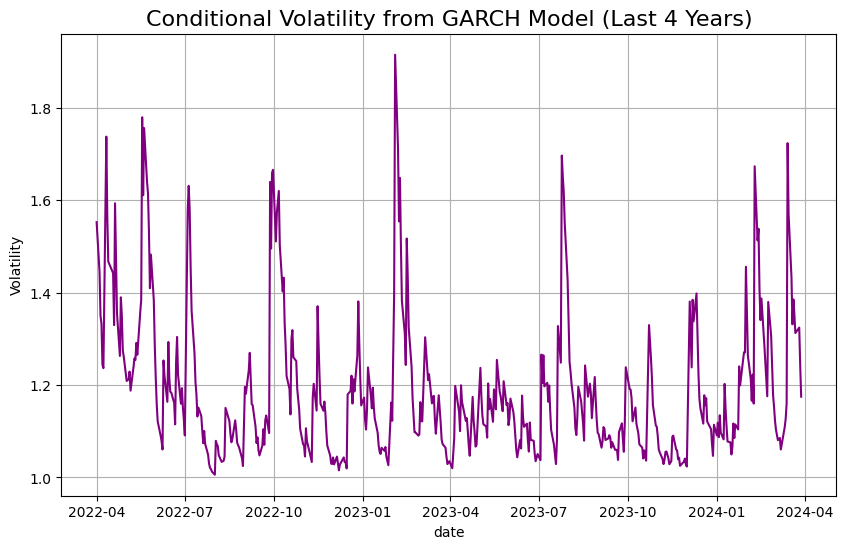

In [26]:
from arch import arch_model

# Fit a GARCH model
model = arch_model(latest_2years_df['Daily Returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Print model summary
print(garch_fit.summary())

# Plot the conditional volatility (predicted by the GARCH model)
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, color='purple')
plt.title('Conditional Volatility from GARCH Model (Last 4 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

# Technical Analysis

## Simple Moving Average (SMA)

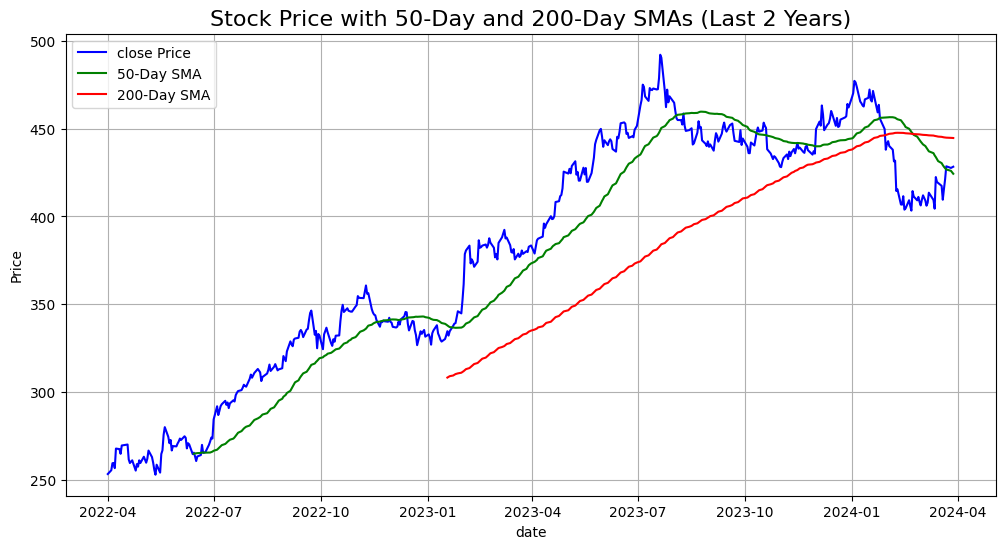

In [27]:
# 50-day and 200-day Simple Moving Averages
latest_2years_df['SMA_50'] = latest_2years_df['close'].rolling(window=50).mean()
latest_2years_df['SMA_200'] = latest_2years_df['close'].rolling(window=200).mean()

# Plot the closing price with the SMAs
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df['close'], label='close Price', color='blue')
plt.plot(latest_2years_df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(latest_2years_df['SMA_200'], label='200-Day SMA', color='red')

plt.title('Stock Price with 50-Day and 200-Day SMAs (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


##  Exponential Moving Average (EMA)

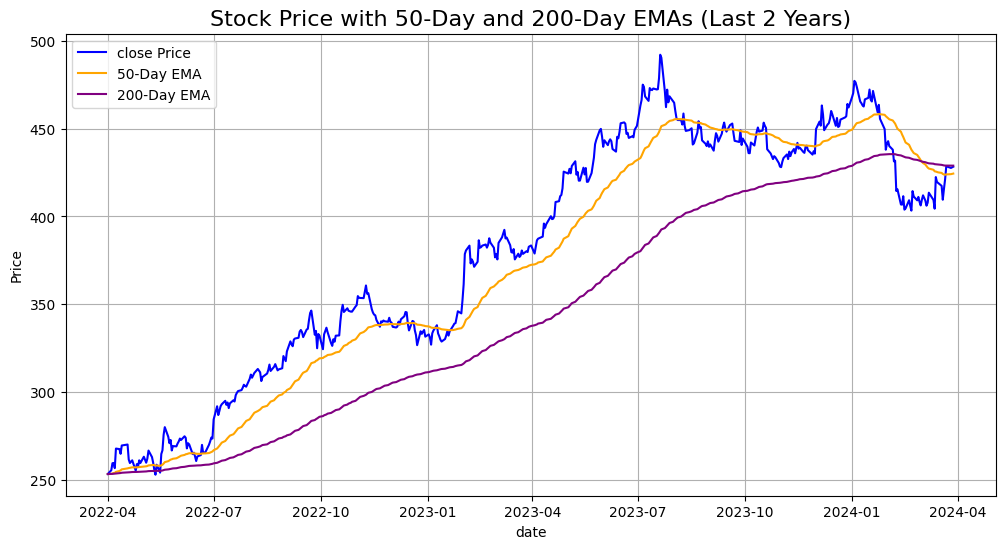

In [28]:
# 50-day and 200-day Exponential Moving Averages
latest_2years_df['EMA_50'] = latest_2years_df['close'].ewm(span=50, adjust=False).mean()
latest_2years_df['EMA_200'] = latest_2years_df['close'].ewm(span=200, adjust=False).mean()

# Plot the closing price with the EMAs
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df['close'], label='close Price', color='blue')
plt.plot(latest_2years_df['EMA_50'], label='50-Day EMA', color='orange')
plt.plot(latest_2years_df['EMA_200'], label='200-Day EMA', color='purple')

plt.title('Stock Price with 50-Day and 200-Day EMAs (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Bollinger Bands

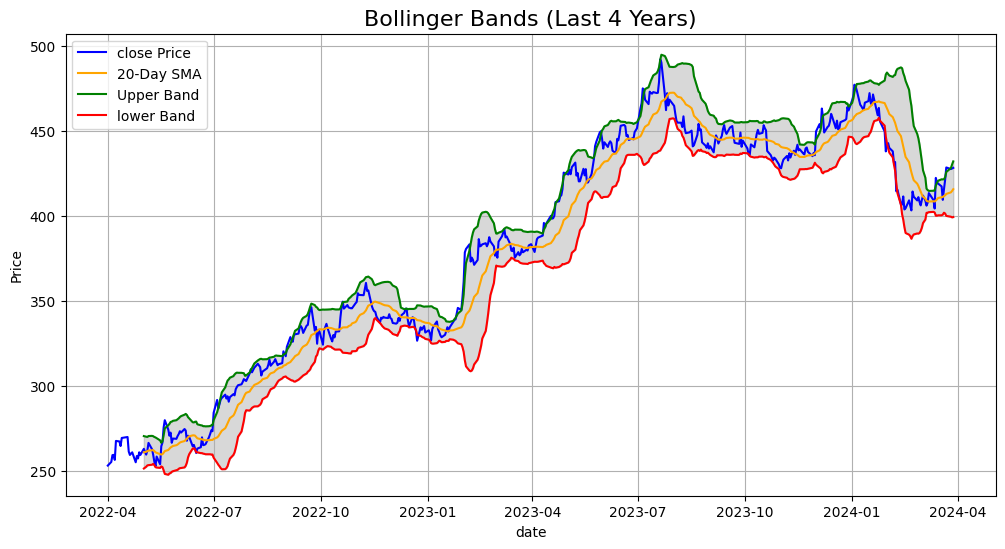

In [29]:
# Calculate 20-day moving average and standard deviation
latest_2years_df['SMA_20'] = latest_2years_df['close'].rolling(window=20).mean()
latest_2years_df['STD_20'] = latest_2years_df['close'].rolling(window=20).std()

# Calculate Bollinger Bands
latest_2years_df['Upper Band'] = latest_2years_df['SMA_20'] + (latest_2years_df['STD_20'] * 2)
latest_2years_df['lower Band'] = latest_2years_df['SMA_20'] - (latest_2years_df['STD_20'] * 2)

# Plot the closing price with Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df['close'], label='close Price', color='blue')
plt.plot(latest_2years_df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(latest_2years_df['Upper Band'], label='Upper Band', color='green')
plt.plot(latest_2years_df['lower Band'], label='lower Band', color='red')

plt.fill_between(latest_2years_df.index, latest_2years_df['Upper Band'], latest_2years_df['lower Band'], color='gray', alpha=0.3)

plt.title('Bollinger Bands (Last 4 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Relative Strength Index (RSI)

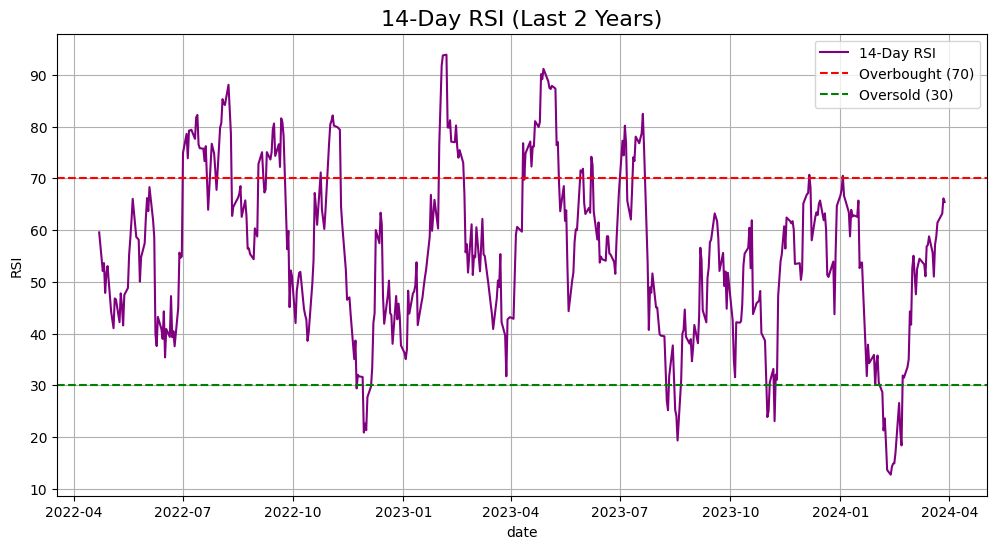

In [30]:
# Function to calculate RSI
def calculate_RSI(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Calculate 14-day RSI
latest_2years_df['RSI_14'] = calculate_RSI(latest_2years_df['close'])

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(latest_2years_df.index, latest_2years_df['RSI_14'], label='14-Day RSI', color='purple')

plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')

plt.title('14-Day RSI (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


# Generating Buy and Sell signals using Indicators 


In [31]:
## Defining Buy and Sell Conditions

# Buy Signal
latest_2years_df['Buy_Signal'] = (
    (latest_2years_df['SMA_50'] > latest_2years_df['SMA_200']) &  # Golden Cross
    (latest_2years_df['RSI_14'] < 30) &  # RSI Oversold
    (latest_2years_df['close'] < latest_2years_df['lower Band'])  # Below lower Bollinger Band
)

# Sell Signal
latest_2years_df['Sell_Signal'] = (
    (latest_2years_df['SMA_50'] < latest_2years_df['SMA_200']) &  # Death Cross
    (latest_2years_df['RSI_14'] > 70) &  # RSI Overbought
    (latest_2years_df['close'] > latest_2years_df['Upper Band'])  # Above Upper Bollinger Band
)

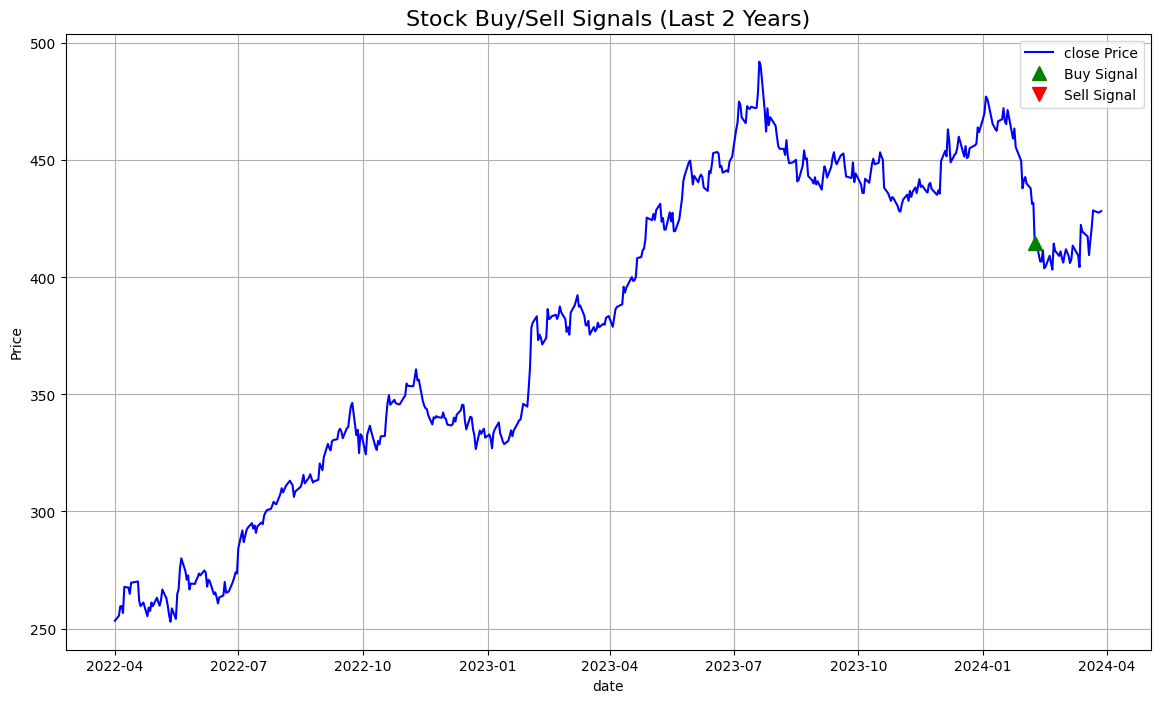

In [32]:
## Plot Buy and Sell Signals on the Stock Chart

plt.figure(figsize=(14, 8))

# Plot the closing price
plt.plot(latest_2years_df['close'], label='close Price', color='blue')

# Plot Buy Signals (Green Markers)
plt.plot(latest_2years_df[latest_2years_df['Buy_Signal']].index, 
         latest_2years_df['close'][latest_2years_df['Buy_Signal']], 
         marker='^', color='green', markersize=10, label='Buy Signal', linestyle='None')

# Plot Sell Signals (Red Markers)
plt.plot(latest_2years_df[latest_2years_df['Sell_Signal']].index, 
         latest_2years_df['close'][latest_2years_df['Sell_Signal']], 
         marker='v', color='red', markersize=10, label='Sell Signal', linestyle='None')

# Add labels and title
plt.title('Stock Buy/Sell Signals (Last 2 Years)', fontsize=16)
plt.xlabel('date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
## To summarize when the signals were generated, printing the dates of the buy and sell signals.

# Print Buy Signals
buy_dates = latest_2years_df[latest_2years_df['Buy_Signal']].index
print("Buy Signals Generated on:")
print(buy_dates)

# Print Sell Signals
sell_dates = latest_2years_df[latest_2years_df['Sell_Signal']].index
print("\nSell Signals Generated on:")
print(sell_dates)

Buy Signals Generated on:
DatetimeIndex(['2024-02-08'], dtype='datetime64[ns]', name='date', freq=None)

Sell Signals Generated on:
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)


# Re-checking the Statergy 

Buy on 2024-02-08 00:00:00 at 414.55


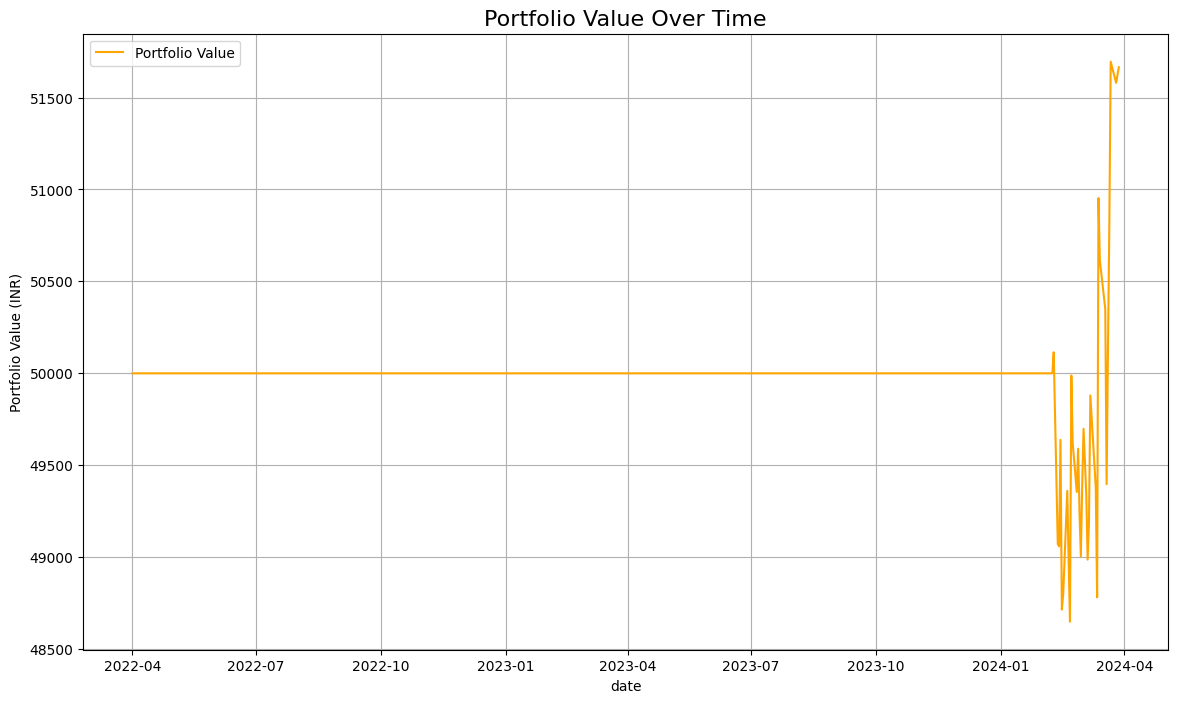

In [34]:
# Initialize variables for backtesting
initial_capital = 50000  # Starting with $50,000
position = 0  # Whether we hold a position (0 means no position, 1 means holding stock)
cash = initial_capital  # Starting cash
portfolio_value = []  # Track portfolio value over time

# Ensure portfolio value starts on the first day
for i in range(len(latest_2years_df)):
    if latest_2years_df['Buy_Signal'].iloc[i] and position == 0:
        # Buy stock
        position = cash / latest_2years_df['close'].iloc[i]
        cash = 0
        print(f"Buy on {latest_2years_df.index[i]} at {latest_2years_df['close'].iloc[i]:.2f}")
    
    elif latest_2years_df['Sell_Signal'].iloc[i] and position > 0:
        # Sell stock
        cash = position * latest_2years_df['close'].iloc[i]
        position = 0
        print(f"Sell on {latest_2years_df.index[i]} at {latest_2years_df['close'].iloc[i]:.2f}")
    
    # Calculate portfolio value at each step
    if position > 0:
        portfolio_value.append(position * latest_2years_df['close'].iloc[i])
    else:
        portfolio_value.append(cash)

# Ensure the length of portfolio_value matches the DataFrame index
if len(portfolio_value) != len(latest_2years_df):
    print(f"Length mismatch: {len(portfolio_value)} values, {len(latest_2years_df)} rows")

# Add the portfolio value to the dataframe for visualization
latest_2years_df['Portfolio_Value'] = portfolio_value

# Plot portfolio value over time
plt.figure(figsize=(14, 8))
plt.plot(latest_2years_df['Portfolio_Value'], label='Portfolio Value', color='orange')
plt.title('Portfolio Value Over Time', fontsize=16)
plt.xlabel('date')
plt.ylabel('Portfolio Value (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Calculate portfolio returns as the percentage change in Portfolio Value
latest_2years_df['Portfolio_Returns'] = latest_2years_df['Portfolio_Value'].pct_change()

# Drop NaN values that may appear after calculating percentage change
latest_2years_df.dropna(subset=['Portfolio_Returns'], inplace=True)

# Inspect the first few rows
print(latest_2years_df[['Portfolio_Value', 'Portfolio_Returns']].head())

            Portfolio_Value  Portfolio_Returns
date                                          
2022-04-04          50000.0                0.0
2022-04-05          50000.0                0.0
2022-04-06          50000.0                0.0
2022-04-07          50000.0                0.0
2022-04-08          50000.0                0.0


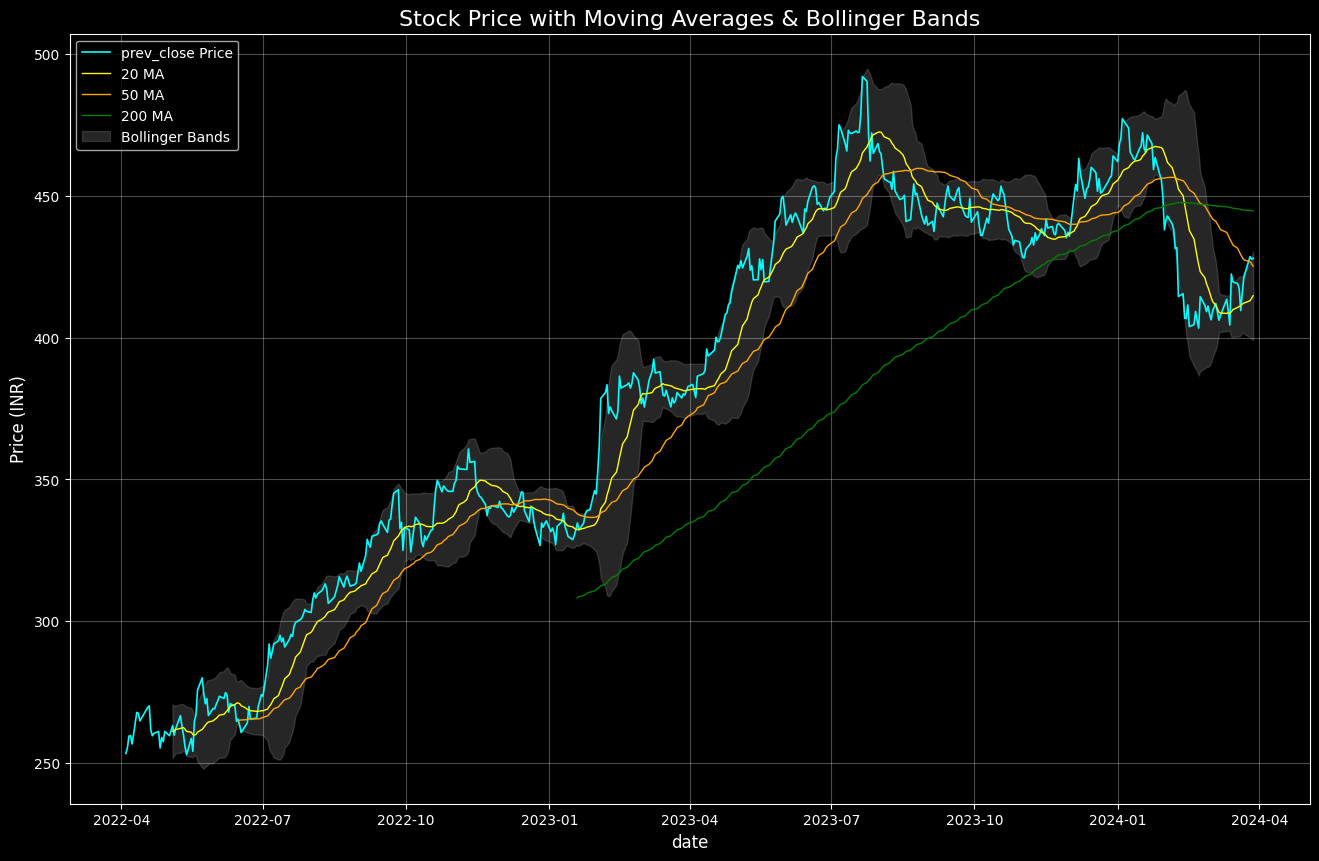

In [36]:
# Ensure 'date' is a column and not an index
if 'date' not in latest_2years_df.columns:
    latest_2years_df = latest_2years_df.reset_index()

# Calculate the 200-day Moving Average (200 MA)
latest_2years_df.loc[:, '200_MA'] = latest_2years_df['prev_close'].rolling(window=200).mean()

# Calculate Bollinger Bands (20-day moving average with standard deviation)
latest_2years_df.loc[:, '20_MA'] = latest_2years_df['prev_close'].rolling(window=20).mean()
latest_2years_df.loc[:, 'BB_upper'] = latest_2years_df['20_MA'] + (latest_2years_df['prev_close'].rolling(window=20).std() * 2)
latest_2years_df.loc[:, 'BB_lower'] = latest_2years_df['20_MA'] - (latest_2years_df['prev_close'].rolling(window=20).std() * 2)

# Calculate the 50-day Moving Average (50 MA)
latest_2years_df.loc[:, '50_MA'] = latest_2years_df['prev_close'].rolling(window=50).mean()

# Plot with a dark theme
plt.style.use('dark_background')
plt.figure(figsize=(16, 10))

# Plot closing price and moving averages
plt.plot(latest_2years_df['date'], latest_2years_df['prev_close'], label='prev_close Price', color='cyan', linewidth=1.2)
plt.plot(latest_2years_df['date'], latest_2years_df['20_MA'], label='20 MA', color='yellow', linewidth=1)
plt.plot(latest_2years_df['date'], latest_2years_df['50_MA'], label='50 MA', color='orange', linewidth=1)
plt.plot(latest_2years_df['date'], latest_2years_df['200_MA'], label='200 MA', color='green', linewidth=1)

# Plot Bollinger Bands
plt.fill_between(latest_2years_df['date'], latest_2years_df['BB_upper'], latest_2years_df['BB_lower'], color='gray', alpha=0.3, label='Bollinger Bands')

# Format the plot
plt.title('Stock Price with Moving Averages & Bollinger Bands', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with 2 rows for Candlestick and volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Candlestick plot
fig.add_trace(go.Candlestick(x=latest_2years_df.index,
                             open=latest_2years_df['open'],
                             high=latest_2years_df['high'],
                             low=latest_2years_df['low'],
                             close=latest_2years_df['close'],
                             name='Candlestick'),
              row=1, col=1)

# volume plot
fig.add_trace(go.Bar(x=latest_2years_df.index, 
                     y=latest_2years_df['volume'], 
                     name='volume'),
              row=2, col=1)

# Update layout
fig.update_layout(title='Stock Price Movement and volume',
                  xaxis_title='date',
                  yaxis_title='Price (INR)',
                  yaxis2_title='volume',
                  showlegend=False)

fig.show()

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate the 20-day and 50-day moving averages
latest_2years_df['20_MA'] = latest_2years_df['close'].rolling(window=20).mean()
latest_2years_df['50_MA'] = latest_2years_df['close'].rolling(window=50).mean()

# Create a figure with 2 rows for Candlestick, volume, and Moving Averages
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Candlestick plot
fig.add_trace(go.Candlestick(x=latest_2years_df.index,
                             open=latest_2years_df['open'],
                             high=latest_2years_df['high'],
                             low=latest_2years_df['low'],
                             close=latest_2years_df['close'],
                             name='Candlestick'),
              row=1, col=1)

# Add the 20-day and 50-day moving averages to the plot
fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['20_MA'], 
                         mode='lines', 
                         name='20-Day MA', 
                         line=dict(color='blue', width=1)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['50_MA'], 
                         mode='lines', 
                         name='50-Day MA', 
                         line=dict(color='red', width=1)),
              row=1, col=1)

# volume plot
fig.add_trace(go.Bar(x=latest_2years_df.index, 
                     y=latest_2years_df['volume'], 
                     name='volume', 
                     marker_color='rgba(0, 100, 255, 0.5)'),
              row=2, col=1)

# Update layout: Increase height and set labels
fig.update_layout(title='Stock Price Movement with 20 & 50-Day MA and volume',
                  height=1000,  # Increase the height of the chart
                  xaxis_title='date',
                  yaxis_title='Price (INR)',
                  yaxis2_title='volume',
                  showlegend=True)

# Show the plot
fig.show()

In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure that the necessary columns exist
latest_2years_df['20_MA'] = latest_2years_df['close'].rolling(window=20).mean()
latest_2years_df['50_MA'] = latest_2years_df['close'].rolling(window=50).mean()
latest_2years_df['200_MA'] = latest_2years_df['close'].rolling(window=200).mean()

# Calculate Bollinger Bands
latest_2years_df['BB_upper'] = latest_2years_df['20_MA'] + (latest_2years_df['close'].rolling(window=20).std() * 2)
latest_2years_df['BB_lower'] = latest_2years_df['20_MA'] - (latest_2years_df['close'].rolling(window=20).std() * 2)

# Create a figure with 2 rows: one for Candlestick and MA, one for volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Candlestick plot
fig.add_trace(go.Candlestick(x=latest_2years_df.index,
                             open=latest_2years_df['open'],
                             high=latest_2years_df['high'],
                             low=latest_2years_df['low'],
                             close=latest_2years_df['close'],
                             name='Candlestick'),
              row=1, col=1)


# Add the 20-day, 50-day, and 200-day moving averages to the plot
fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['20_MA'], 
                         mode='lines', 
                         name='20-Day MA', 
                         line=dict(color='blue', width=1)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['50_MA'], 
                         mode='lines', 
                         name='50-Day MA', 
                         line=dict(color='red', width=1)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['200_MA'], 
                         mode='lines', 
                         name='200-Day MA', 
                         line=dict(color='green', width=1)),
              row=1, col=1)

# Add Bollinger Bands (upper and lower)
fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['BB_upper'], 
                         mode='lines', 
                         name='Bollinger Upper Band', 
                         line=dict(color='gray', width=1, dash='dash')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['BB_lower'], 
                         mode='lines', 
                         name='Bollinger lower Band', 
                         line=dict(color='gray', width=1, dash='dash')),
              row=1, col=1)

# volume plot
fig.add_trace(go.Bar(x=latest_2years_df.index, 
                     y=latest_2years_df['volume'], 
                     name='volume', 
                     marker_color='rgba(0, 100, 255, 0.5)'),
              row=2, col=1)

# Update layout: Increase height, add title, labels, and set dark theme
fig.update_layout(title='Stock Price Movement with Moving Averages, Bollinger Bands, and volume',
                  height=1000,  # Height of the chart
                  xaxis_title='date',
                  yaxis_title='Price (INR)',
                  yaxis2_title='volume',
                  showlegend=True,
                  template='plotly_dark')  # Dark theme

# Display the plot
fig.show()

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure that the necessary columns exist
latest_2years_df['20_MA'] = latest_2years_df['close'].rolling(window=20).mean()
latest_2years_df['50_MA'] = latest_2years_df['close'].rolling(window=50).mean()
latest_2years_df['200_MA'] = latest_2years_df['close'].rolling(window=200).mean()

# Calculate Bollinger Bands
latest_2years_df['BB_upper'] = latest_2years_df['20_MA'] + (latest_2years_df['close'].rolling(window=20).std() * 2)
latest_2years_df['BB_lower'] = latest_2years_df['20_MA'] - (latest_2years_df['close'].rolling(window=20).std() * 2)

# Create a figure with 2 rows: one for Candlestick and MA, one for volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Candlestick plot
fig.add_trace(go.Candlestick(x=latest_2years_df.index,
                             open=latest_2years_df['open'],
                             high=latest_2years_df['high'],
                             low=latest_2years_df['low'],
                             close=latest_2years_df
                             ['close'],
                             name='Candlestick'),
              row=1, col=1)

# Add the 20-day, 50-day, and 200-day moving averages to the plot
fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['20_MA'], 
                         mode='lines', 
                         name='20-Day MA', 
                         line=dict(color='blue', width=1)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['50_MA'], 
                         mode='lines', 
                         name='50-Day MA', 
                         line=dict(color='red', width=1)),
              row=1, col=1)

#  reference="top", showticksuffix="last"

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['200_MA'], 
                         mode='lines', 
                         name='200-Day MA', 
                         line=dict(color='green', width=1)),
              row=1, col=1)

# Add Bollinger Bands (upper and lower)
fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['BB_upper'], 
                         mode='lines', 
                         name='Bollinger Upper Band', 
                         line=dict(color='gray', width=1, dash='dash')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=latest_2years_df.index, 
                         y=latest_2years_df['BB_lower'], 
                         mode='lines', 
                         name='Bollinger lower Band', 
                         line=dict(color='gray', width=1, dash='dash')),
              row=1, col=1)

# volume plot
fig.add_trace(go.Bar(x=latest_2years_df.index, 
                     y=latest_2years_df['volume'], 
                     name='volume', 
                     marker_color='rgba(0, 100, 255, 0.5)'),
              row=2, col=1)

# Update layout: Increase height, add title, labels, and set dark theme
fig.update_layout(title='Stock Price Movement with Moving Averages, Bollinger Bands, and volume',
                  height=1000,  # Height of the chart
                  xaxis_title='date',
                  yaxis_title='Price (INR)',
                  yaxis2_title='volume',
                  showlegend=True,
                  template='plotly_dark',  # Dark theme
                  
                  # Add interactivity for zooming/panning
                  xaxis_rangeslider_visible=True,  # Disable default range slider
                  
                  # Update date formatting and rotation
                  xaxis=dict(tickangle=-45, title_text="date", showline=True, showgrid=True),
                  
                  # Add custom range selector buttons for zooming
                  xaxis2=dict(
                      rangeselector=dict(
                          buttons=list([
                              dict(count=1, label="1M", step="month", stepmode="backward"),
                              dict(count=6, label="6M", step="month", stepmode="backward"),
                              dict(count=1, label="YTD", step="year", stepmode="todate"),
                              dict(count=1, label="1Y", step="year", stepmode="backward"),
                              dict(step="all")
                          ])
                      ),
                      rangeslider=dict(visible=True),  # Custom range slider visible
                      type="date"  # date axis type
                  ))

# Show the plot
fig.show()